In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

experiment_name = "M2"
__RECALLAT__ = 5

In [2]:
class Experimenter:
    def __init__(self, experiment_name):
        self._files = []
        self.experiment_name = experiment_name
    def append(self, recommender_list, forgetting_list, parameters_list):
        for r in recommender_list:
            for p in parameters_list:
                for f in forgetting_list:
                    self._files.append("{}_{}_{}_{}.dat".format(r, f, p, self.experiment_name))
    def __getitem__(self, position):
        return self._files[position]

In [3]:
experimenter = Experimenter(experiment_name)
recommender_list = ["MFRecommender"]
# experimenter.append(recommender_list, ["ForgetUnpopularItems"], [1.2])
# experimenter.append(recommender_list, ["NoForgetting"], [None])
# experimenter.append(recommender_list, ["UserFactorFading"], [0.99])
experimenter.append(recommender_list, ["SDUserFactorFading"], [100])
# experimenter.append(recommender_list, ["MappedUserFactorFading"], [2.])
# experimenter.append(recommender_list, ["MappedUserFactorFading"], [1, 1.1, 1.3, 1.5, 1.8, 2.])

In [4]:
class Recall:
    def __init__(self, n):
        self.n = n
        self.hits = 0
        self.stream = 0 
    def update(self, rank):
        if rank <= self.n:
            self.hits += 1
        self.stream += 1
        return self.score()
    def score(self):
        return self.hits/self.stream
    
class Position:
    def update(self, rank):
        print(rank)
        return (1002 - rank)/1001

In [5]:
# (top-1 score, where the correct item is ranked, rec time, update time)

def getDF(files):
    defined = False
    recallDF = None
    uptimeDF = None
    rectimeDF = None
    for file in files:
        metric = Recall(__RECALLAT__)
        with open("D:\\recsys\\flurs\\results\\{}".format(file)) as f:
            file = file.replace('.dat','')
            file = file.replace('Recommender_','/')
            data = f.read().split(')')
            data.remove('')
            recallList = []
            uptimeList = []
            rectimeList = []
            indexList = []
            for index, line in enumerate(data):
                line = line.replace('(','')
                line = line.replace(' ','')
                info = line.split(',')
                recallList.append(metric.update(int(info[1])))
                uptimeList.append(float(info[2]))
                rectimeList.append(float(info[3]))
                indexList.append(index)
            if defined:
                recallDF = recallDF.merge(pd.DataFrame({file : recallList, "Index": indexList}), on='Index', how='left')
                uptimeDF = uptimeDF.merge(pd.DataFrame({file : uptimeList, "Index": indexList}), on='Index', how='left')
                rectimeDF = rectimeDF.merge(pd.DataFrame({file : rectimeList, "Index": indexList}), on='Index', how='left')
            else:
                defined = True
                recallDF = pd.DataFrame({"Index": indexList, file : recallList})
                uptimeDF = pd.DataFrame({"Index": indexList, file : uptimeList})
                rectimeDF = pd.DataFrame({"Index": indexList, file : rectimeList})

    recallDF = recallDF.drop(columns=['Index'])
    uptimeDF = uptimeDF.drop(columns=['Index'])
    rectimeDF = rectimeDF.drop(columns=['Index'])
    return recallDF, uptimeDF, rectimeDF

In [23]:
def plot(recallDF, name):
    plt.rcParams['figure.figsize'] = (12,8)
    with plt.style.context(('ggplot')):
        ax = recallDF.plot(lw=2, colormap='jet', marker='.', markersize=1, title=name)
        plt.ylim([0.001,0.008])
        ax.set(xlabel="", ylabel='Recall@{}'.format(__RECALLAT__))

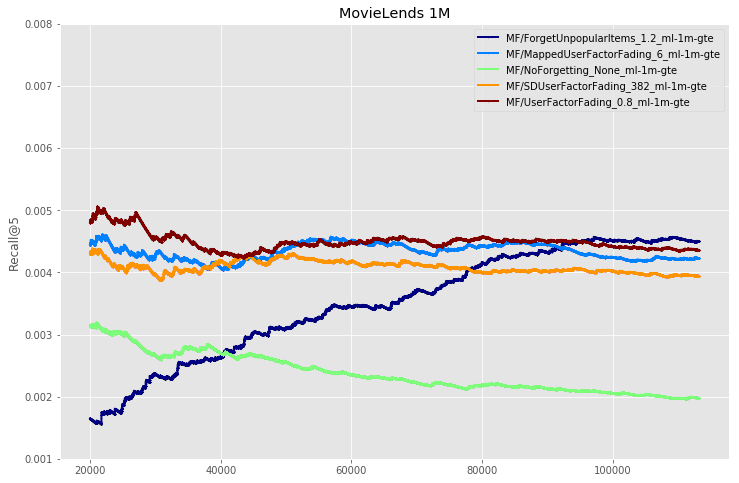

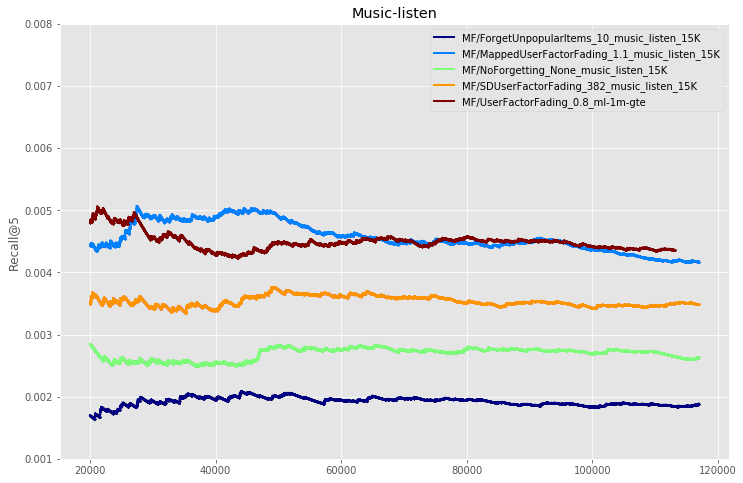

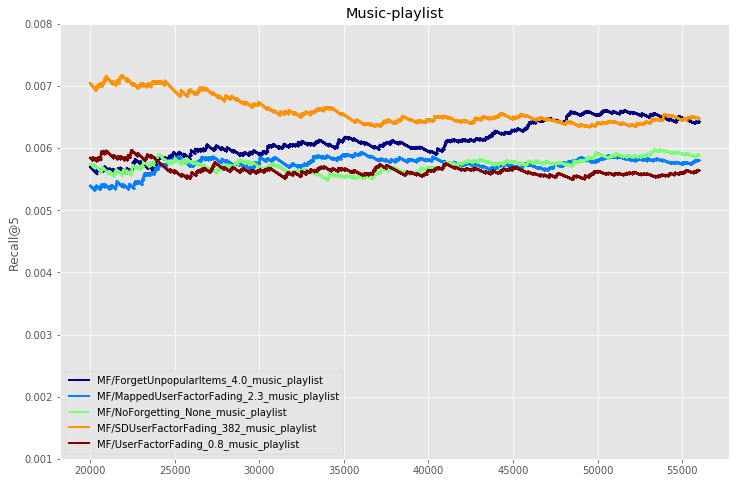

In [24]:
recallML, uptimeML, rectimeML = getDF(["MFRecommender_ForgetUnpopularItems_1.2_ml-1m-gte.dat", 
         "MFRecommender_MappedUserFactorFading_6_ml-1m-gte.dat", 
         "MFRecommender_NoForgetting_None_ml-1m-gte.dat", 
         "MFRecommender_SDUserFactorFading_382_ml-1m-gte.dat", 
         "MFRecommender_UserFactorFading_0.8_ml-1m-gte.dat"])

plot(recallML[20000:], "MovieLens 1M")

recallMusic, uptimeMusic, rectimeMusic = getDF(["MFRecommender_ForgetUnpopularItems_10_music_listen_15K.dat", 
         "MFRecommender_MappedUserFactorFading_1.1_music_listen_15K.dat", 
         "MFRecommender_NoForgetting_None_music_listen_15K.dat", 
         "MFRecommender_SDUserFactorFading_382_music_listen_15K.dat", 
         "MFRecommender_UserFactorFading_0.8_ml-1m-gte.dat"])

plot(recallMusic[20000:], "Music-listen")

recallMP, uptimeMP, rectimeMP = getDF(["MFRecommender_ForgetUnpopularItems_4.0_music_playlist.dat", 
         "MFRecommender_MappedUserFactorFading_2.3_music_playlist.dat", 
         "MFRecommender_NoForgetting_None_music_playlist.dat", 
         "MFRecommender_SDUserFactorFading_382_music_playlist.dat", 
         "MFRecommender_UserFactorFading_0.8_music_playlist.dat"])

plot(recallMP[20000:], "Music-playlist")

In [26]:
recallML[20000:].mean()

MF/ForgetUnpopularItems_1.2_ml-1m-gte    0.003512
MF/MappedUserFactorFading_6_ml-1m-gte    0.004343
MF/NoForgetting_None_ml-1m-gte           0.002382
MF/SDUserFactorFading_382_ml-1m-gte      0.004092
MF/UserFactorFading_0.8_ml-1m-gte        0.004500
dtype: float64

In [27]:
rectimeML[20000:].mean()

MF/ForgetUnpopularItems_1.2_ml-1m-gte    0.000120
MF/MappedUserFactorFading_6_ml-1m-gte    0.000182
MF/NoForgetting_None_ml-1m-gte           0.000023
MF/SDUserFactorFading_382_ml-1m-gte      0.000148
MF/UserFactorFading_0.8_ml-1m-gte        0.000106
dtype: float64

In [28]:
uptimeML[20000:].mean()

MF/ForgetUnpopularItems_1.2_ml-1m-gte    0.000288
MF/MappedUserFactorFading_6_ml-1m-gte    0.000263
MF/NoForgetting_None_ml-1m-gte           0.000252
MF/SDUserFactorFading_382_ml-1m-gte      0.000270
MF/UserFactorFading_0.8_ml-1m-gte        0.000262
dtype: float64

In [15]:
recallMusic[20000:].mean()

MF/ForgetUnpopularItems_10_music_listen_15K       0.001926
MF/MappedUserFactorFading_1.1_music_listen_15K    0.004578
MF/NoForgetting_None_music_listen_15K             0.002699
MF/SDUserFactorFading_382_music_listen_15K        0.003541
MF/UserFactorFading_0.8_ml-1m-gte                 0.004500
dtype: float64

In [30]:
rectimeMusic[20000:].mean()

MF/ForgetUnpopularItems_10_music_listen_15K       0.000153
MF/MappedUserFactorFading_1.1_music_listen_15K    0.000254
MF/NoForgetting_None_music_listen_15K             0.000027
MF/SDUserFactorFading_382_music_listen_15K        0.000214
MF/UserFactorFading_0.8_ml-1m-gte                 0.000106
dtype: float64

In [29]:
uptimeMusic[20000:].mean()

MF/ForgetUnpopularItems_10_music_listen_15K       0.000349
MF/MappedUserFactorFading_1.1_music_listen_15K    0.000534
MF/NoForgetting_None_music_listen_15K             0.000375
MF/SDUserFactorFading_382_music_listen_15K        0.000571
MF/UserFactorFading_0.8_ml-1m-gte                 0.000262
dtype: float64

In [16]:
recallMP[20000:].mean()

MF/ForgetUnpopularItems_4.0_music_playlist      0.006141
MF/MappedUserFactorFading_2.3_music_playlist    0.005749
MF/NoForgetting_None_music_playlist             0.005736
MF/SDUserFactorFading_382_music_playlist        0.006608
MF/UserFactorFading_0.8_music_playlist          0.005651
dtype: float64

In [31]:
rectimeMP[20000:].mean()

MF/ForgetUnpopularItems_4.0_music_playlist      0.000182
MF/MappedUserFactorFading_2.3_music_playlist    0.000259
MF/NoForgetting_None_music_playlist             0.000032
MF/SDUserFactorFading_382_music_playlist        0.000223
MF/UserFactorFading_0.8_music_playlist          0.000177
dtype: float64

In [32]:
uptimeMP[20000:].mean()

MF/ForgetUnpopularItems_4.0_music_playlist      0.000455
MF/MappedUserFactorFading_2.3_music_playlist    0.000517
MF/NoForgetting_None_music_playlist             0.000773
MF/SDUserFactorFading_382_music_playlist        0.000556
MF/UserFactorFading_0.8_music_playlist          0.001004
dtype: float64